# Imports

In [6]:
import pickle
import pandas as pd
import numpy as np

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

# custom functions
import sys
sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
from evaluate_model import *
from ADF import *
from arima_model import *
from rf_model import *

# set random seed
seed_value = 2022

# Datasets

In [10]:
df_time_features_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_time_features_pre_COVID.pkl", "rb" ))
df_time_features = pickle.load(open(r"..\data\flu_cases\df_time_features.pkl", "rb" ))

# RF - Time Features - Pre-COVID

In [30]:
df_time_features_pre_COVID.head()

,Total Cases,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,this week last year,two-week moving average,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,season_Spring,season_Summer,season_Winter
0,2.0,13.0,13.0,8.0,9.0,7.0,18.0,10.0,9.0,13.0,...,0,0,0,0,0,0,1,0,0,0
1,18.0,2.0,13.0,13.0,8.0,9.0,7.0,18.0,18.0,7.5,...,0,0,0,0,0,0,1,0,0,0
2,23.0,18.0,2.0,13.0,13.0,8.0,9.0,7.0,15.0,10.0,...,0,0,0,0,0,0,1,0,0,0
3,44.0,23.0,18.0,2.0,13.0,13.0,8.0,9.0,29.0,20.5,...,0,0,0,0,0,0,1,0,0,0
4,63.0,44.0,23.0,18.0,2.0,13.0,13.0,8.0,59.0,33.5,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_time_features_pre_COVID.columns

Index(['Total Cases', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5', 't - 6',
       't - 7', 'this week last year', 'two-week moving average',
       'expanding mean', 'year_2017', 'year_2018', 'year_2019', 'year_2020',
       'year_2021', 'year_2022', 'month_10', 'month_11', 'month_12', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

Shape of train_X: (182, 30)
Shape of train_y: (182, 1)
Shape of test_X: (1, 30)
Shape of test_y: (1, 1)


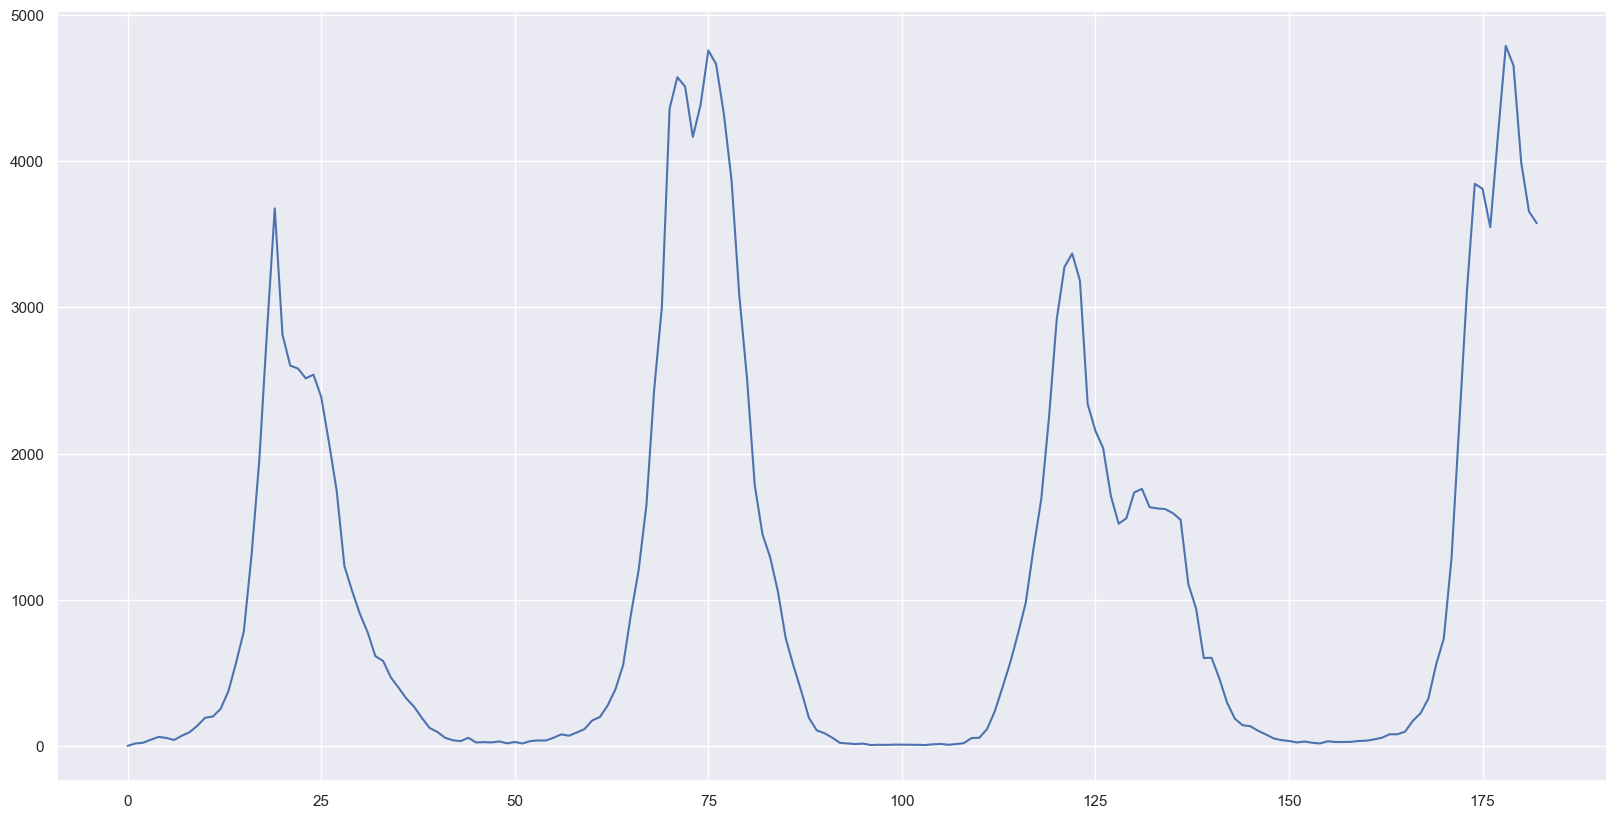

In [12]:
results_matrix = rf_model(data=df_time_features_pre_COVID, weeks_to_predict=1, df_name='df_time_features_pre_COVID', max_depth=None)

In [13]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test
0,rf,df_COVID_terms_pre_COVID,1,1284097.656,1133.18,863.896,202574.741,450.083,450.083
0,rf,df_COVID_terms_pre_COVID,2,1281098.556,1131.856,864.074,261765.646,511.63,510.064
0,rf,df_COVID_terms_pre_COVID,3,1263787.214,1124.183,863.332,144140.878,379.659,334.898
0,rf,df_COVID_terms_pre_COVID,4,1243927.645,1115.315,861.737,327080.118,571.909,387.797
0,rf,df_COVID_terms,1,983371.642,991.651,682.959,18217137.404,4268.154,4268.154
0,rf,df_COVID_terms,2,958233.029,978.894,672.53,15902387.801,3987.78,3933.119
0,rf,df_COVID_terms,3,951315.944,975.354,670.339,12901224.544,3591.827,3367.181
0,rf,df_COVID_terms,4,952351.794,975.885,670.829,9855763.71,3139.389,2656.231
0,rf,df_flu_symptoms_pre_COVID,1,208978.844,457.142,286.683,435719.268,660.09,660.09
0,rf,df_flu_symptoms_pre_COVID,2,207860.258,455.917,283.864,424747.631,651.727,650.498


Shape of train_X: (181, 30)
Shape of train_y: (181, 1)
Shape of test_X: (2, 30)
Shape of test_y: (2, 1)


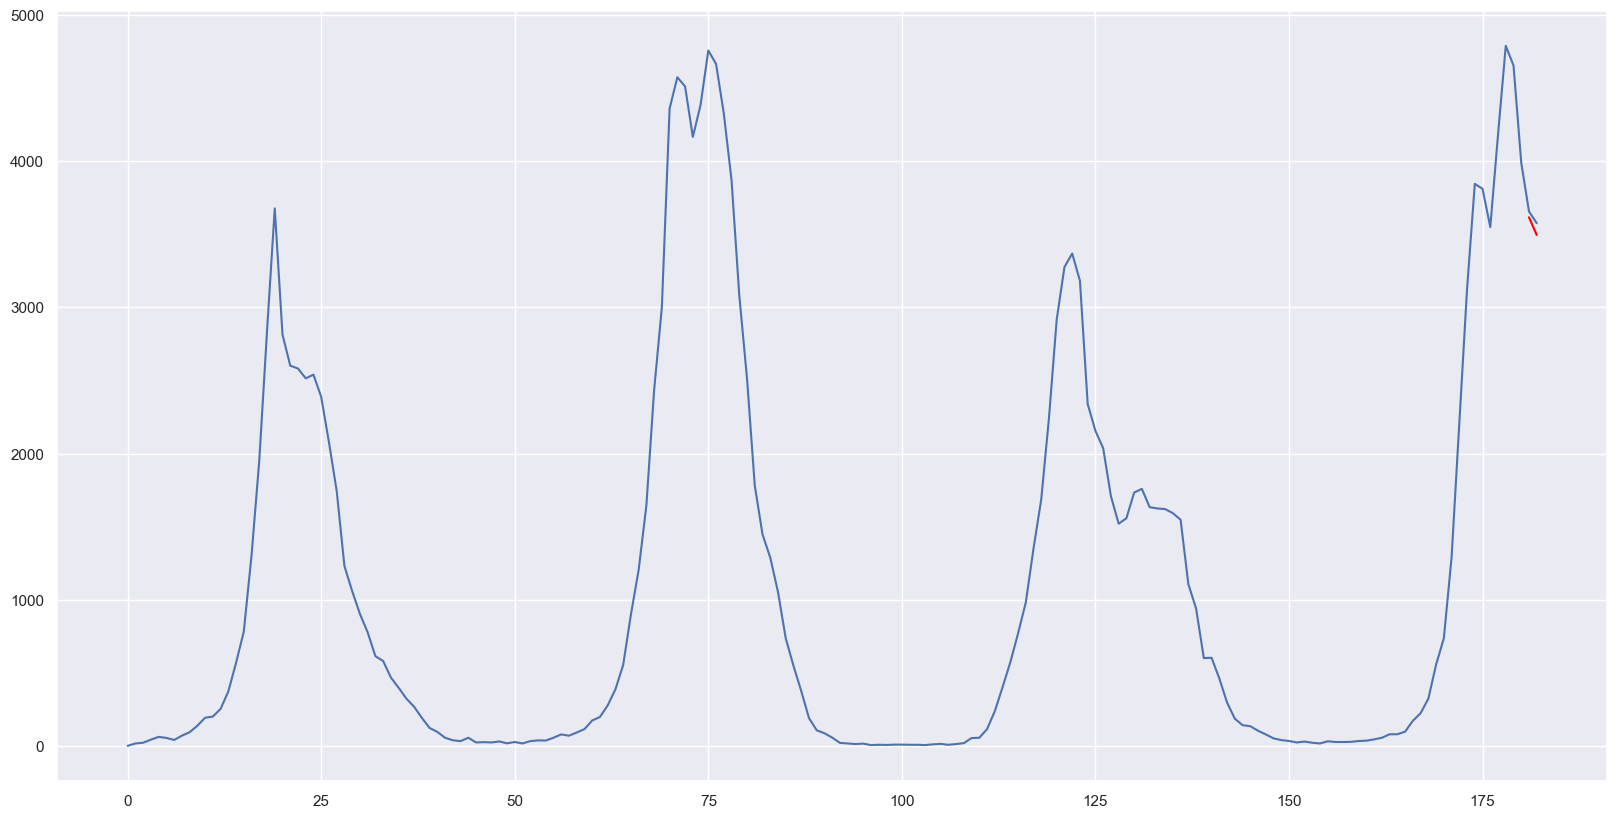

In [14]:
results_matrix = rf_model(data=df_time_features_pre_COVID, weeks_to_predict=2, df_name='df_time_features_pre_COVID', max_depth=None)

In [15]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test
0,rf,df_COVID_terms_pre_COVID,1,1284097.656,1133.18,863.896,202574.741,450.083,450.083
0,rf,df_COVID_terms_pre_COVID,2,1281098.556,1131.856,864.074,261765.646,511.63,510.064
0,rf,df_COVID_terms_pre_COVID,3,1263787.214,1124.183,863.332,144140.878,379.659,334.898
0,rf,df_COVID_terms_pre_COVID,4,1243927.645,1115.315,861.737,327080.118,571.909,387.797
0,rf,df_COVID_terms,1,983371.642,991.651,682.959,18217137.404,4268.154,4268.154
0,rf,df_COVID_terms,2,958233.029,978.894,672.53,15902387.801,3987.78,3933.119
0,rf,df_COVID_terms,3,951315.944,975.354,670.339,12901224.544,3591.827,3367.181
0,rf,df_COVID_terms,4,952351.794,975.885,670.829,9855763.71,3139.389,2656.231
0,rf,df_flu_symptoms_pre_COVID,1,208978.844,457.142,286.683,435719.268,660.09,660.09
0,rf,df_flu_symptoms_pre_COVID,2,207860.258,455.917,283.864,424747.631,651.727,650.498


Shape of train_X: (180, 30)
Shape of train_y: (180, 1)
Shape of test_X: (3, 30)
Shape of test_y: (3, 1)


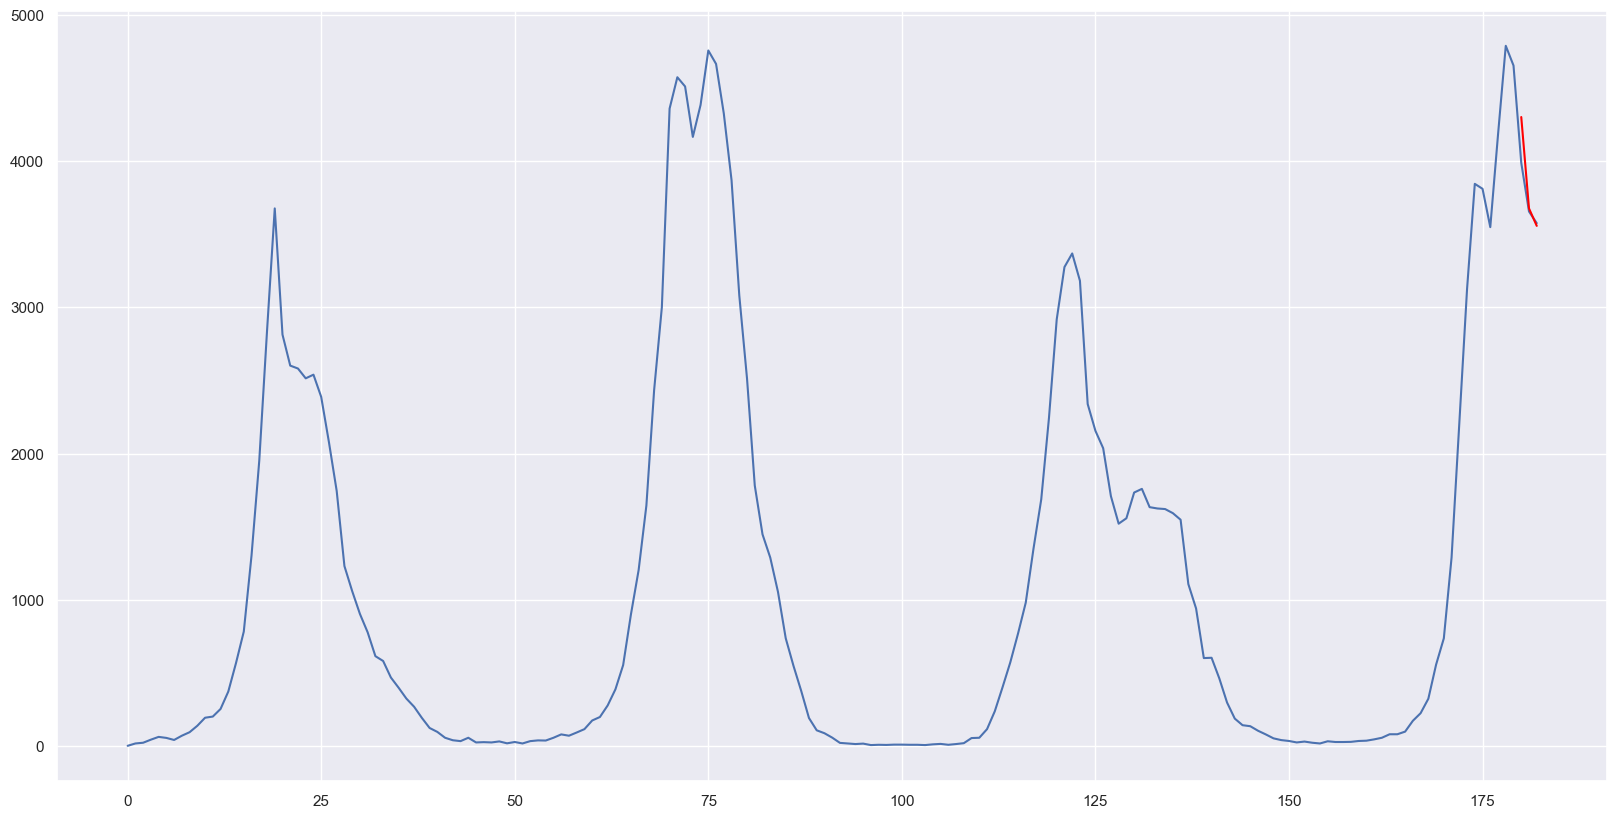

In [16]:
results_matrix = rf_model(data=df_time_features_pre_COVID, weeks_to_predict=3, df_name='df_time_features_pre_COVID', max_depth=None)

In [17]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test
0,rf,df_COVID_terms_pre_COVID,1,1284097.656,1133.18,863.896,202574.741,450.083,450.083
0,rf,df_COVID_terms_pre_COVID,2,1281098.556,1131.856,864.074,261765.646,511.63,510.064
0,rf,df_COVID_terms_pre_COVID,3,1263787.214,1124.183,863.332,144140.878,379.659,334.898
0,rf,df_COVID_terms_pre_COVID,4,1243927.645,1115.315,861.737,327080.118,571.909,387.797
0,rf,df_COVID_terms,1,983371.642,991.651,682.959,18217137.404,4268.154,4268.154
0,rf,df_COVID_terms,2,958233.029,978.894,672.53,15902387.801,3987.78,3933.119
0,rf,df_COVID_terms,3,951315.944,975.354,670.339,12901224.544,3591.827,3367.181
0,rf,df_COVID_terms,4,952351.794,975.885,670.829,9855763.71,3139.389,2656.231
0,rf,df_flu_symptoms_pre_COVID,1,208978.844,457.142,286.683,435719.268,660.09,660.09
0,rf,df_flu_symptoms_pre_COVID,2,207860.258,455.917,283.864,424747.631,651.727,650.498


Shape of train_X: (179, 30)
Shape of train_y: (179, 1)
Shape of test_X: (4, 30)
Shape of test_y: (4, 1)


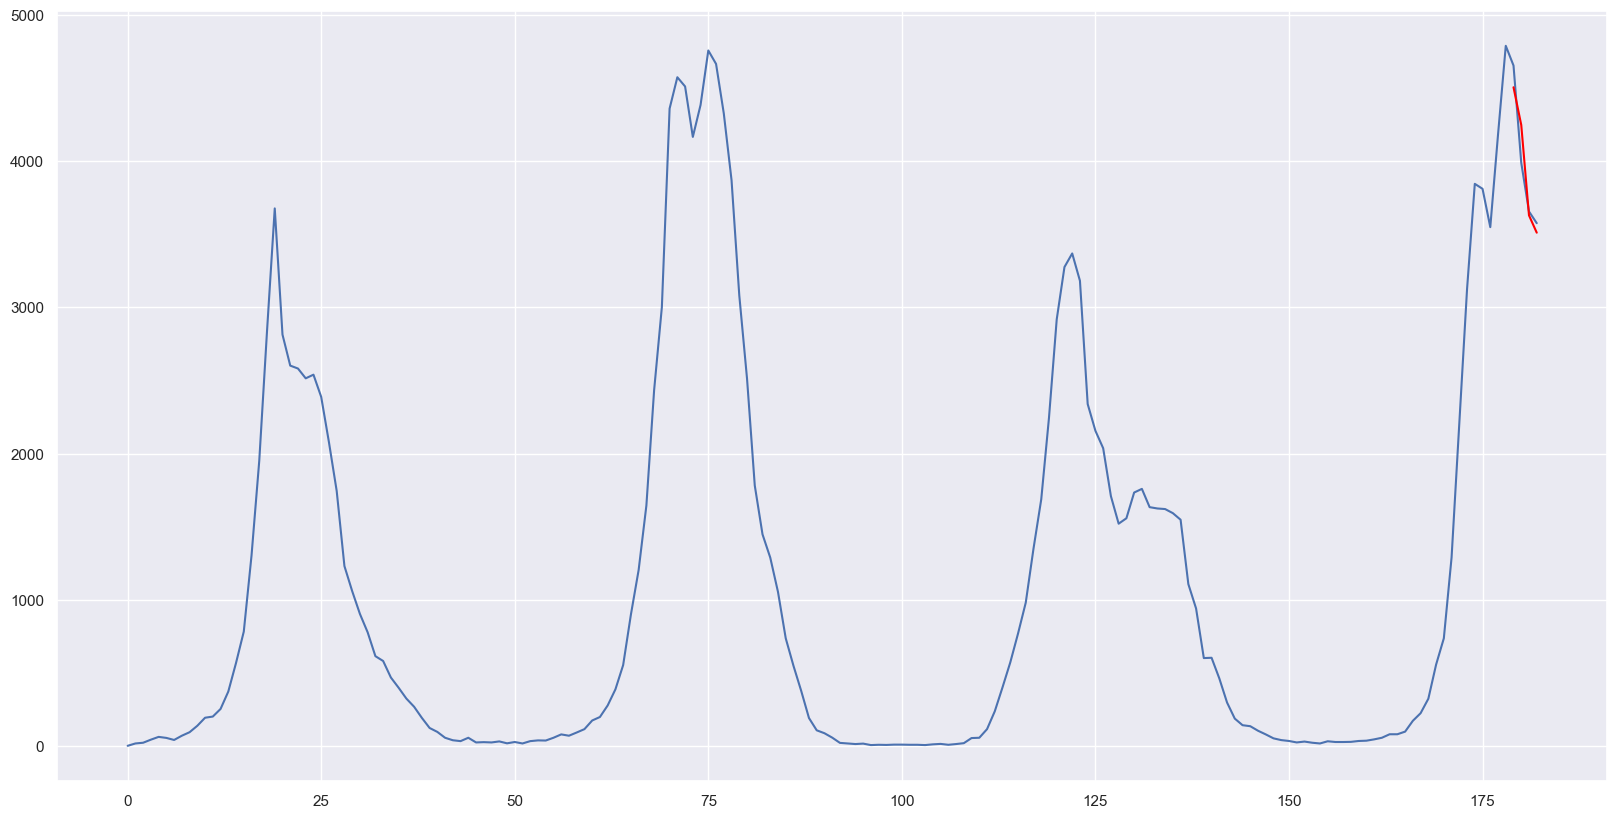

In [18]:
results_matrix = rf_model(data=df_time_features_pre_COVID, weeks_to_predict=4, df_name='df_time_features_pre_COVID', max_depth=None)

In [19]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test
0,rf,df_COVID_terms_pre_COVID,1,1284097.656,1133.18,863.896,202574.741,450.083,450.083
0,rf,df_COVID_terms_pre_COVID,2,1281098.556,1131.856,864.074,261765.646,511.63,510.064
0,rf,df_COVID_terms_pre_COVID,3,1263787.214,1124.183,863.332,144140.878,379.659,334.898
0,rf,df_COVID_terms_pre_COVID,4,1243927.645,1115.315,861.737,327080.118,571.909,387.797
0,rf,df_COVID_terms,1,983371.642,991.651,682.959,18217137.404,4268.154,4268.154
0,rf,df_COVID_terms,2,958233.029,978.894,672.53,15902387.801,3987.78,3933.119
0,rf,df_COVID_terms,3,951315.944,975.354,670.339,12901224.544,3591.827,3367.181
0,rf,df_COVID_terms,4,952351.794,975.885,670.829,9855763.71,3139.389,2656.231
0,rf,df_flu_symptoms_pre_COVID,1,208978.844,457.142,286.683,435719.268,660.09,660.09
0,rf,df_flu_symptoms_pre_COVID,2,207860.258,455.917,283.864,424747.631,651.727,650.498


# RF - Time Features - Post-COVID

In [20]:
df_time_features.head()

,Total Cases,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,this week last year,two-week moving average,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,season_Spring,season_Summer,season_Winter
0,2.0,13.0,13.0,8.0,9.0,7.0,18.0,10.0,9.0,13.0,...,0,0,0,0,0,0,1,0,0,0
1,18.0,2.0,13.0,13.0,8.0,9.0,7.0,18.0,18.0,7.5,...,0,0,0,0,0,0,1,0,0,0
2,23.0,18.0,2.0,13.0,13.0,8.0,9.0,7.0,15.0,10.0,...,0,0,0,0,0,0,1,0,0,0
3,44.0,23.0,18.0,2.0,13.0,13.0,8.0,9.0,29.0,20.5,...,0,0,0,0,0,0,1,0,0,0
4,63.0,44.0,23.0,18.0,2.0,13.0,13.0,8.0,59.0,33.5,...,0,0,0,0,0,0,0,0,0,0


Shape of train_X: (324, 30)
Shape of train_y: (324, 1)
Shape of test_X: (1, 30)
Shape of test_y: (1, 1)


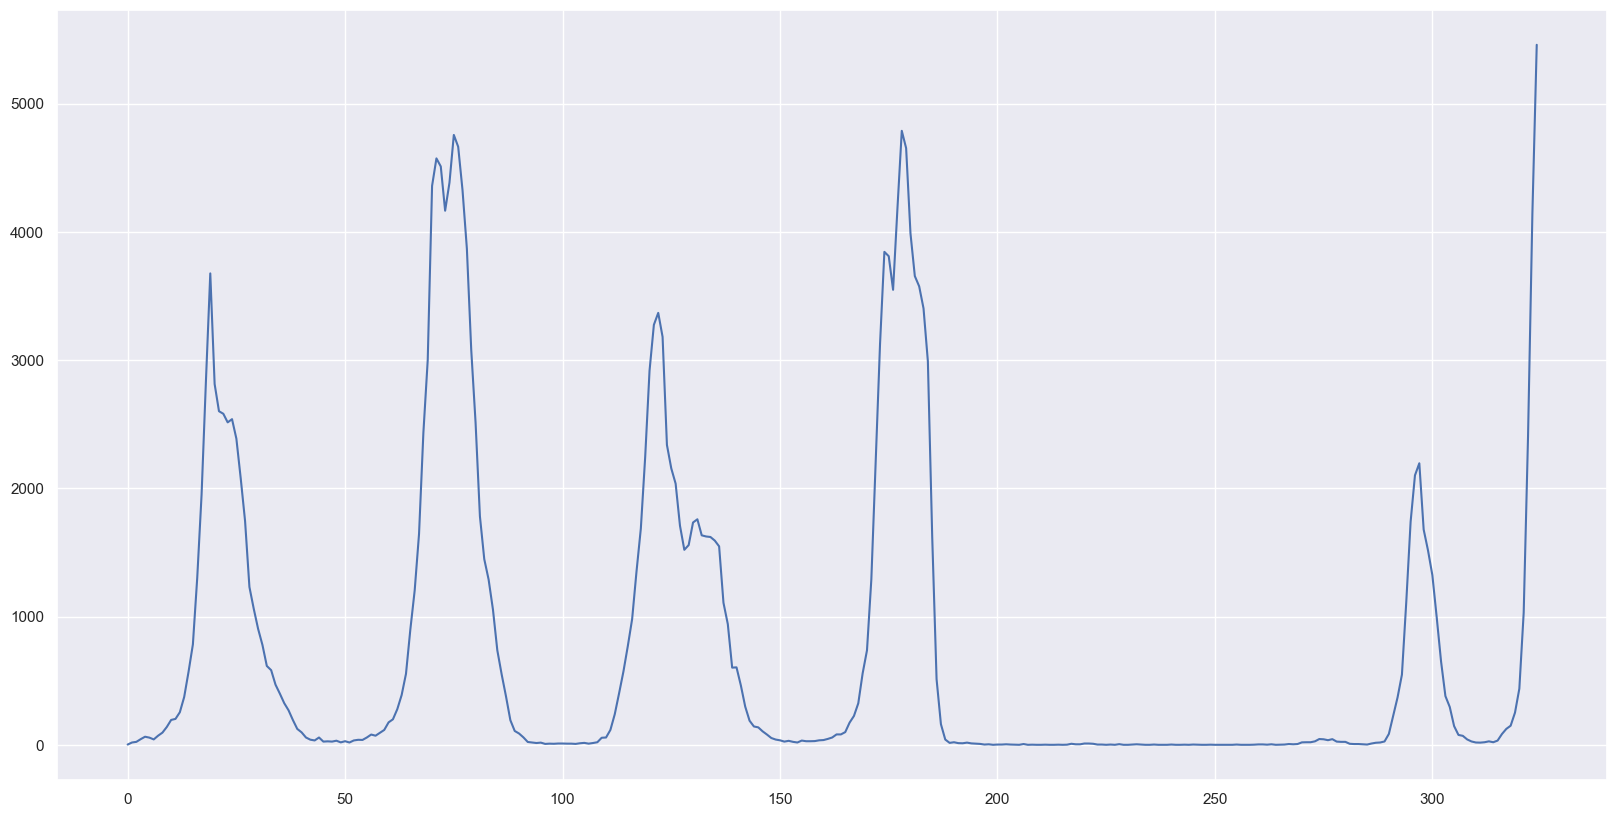

In [21]:
results_matrix = rf_model(data=df_time_features, weeks_to_predict=1, df_name='df_time_features', max_depth=None)

In [22]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test
0,rf,df_COVID_terms_pre_COVID,1,1284097.656,1133.18,863.896,202574.741,450.083,450.083
0,rf,df_COVID_terms_pre_COVID,2,1281098.556,1131.856,864.074,261765.646,511.63,510.064
0,rf,df_COVID_terms_pre_COVID,3,1263787.214,1124.183,863.332,144140.878,379.659,334.898
0,rf,df_COVID_terms_pre_COVID,4,1243927.645,1115.315,861.737,327080.118,571.909,387.797
0,rf,df_COVID_terms,1,983371.642,991.651,682.959,18217137.404,4268.154,4268.154
0,rf,df_COVID_terms,2,958233.029,978.894,672.53,15902387.801,3987.78,3933.119
0,rf,df_COVID_terms,3,951315.944,975.354,670.339,12901224.544,3591.827,3367.181
0,rf,df_COVID_terms,4,952351.794,975.885,670.829,9855763.71,3139.389,2656.231
0,rf,df_flu_symptoms_pre_COVID,1,208978.844,457.142,286.683,435719.268,660.09,660.09
0,rf,df_flu_symptoms_pre_COVID,2,207860.258,455.917,283.864,424747.631,651.727,650.498


Shape of train_X: (323, 30)
Shape of train_y: (323, 1)
Shape of test_X: (2, 30)
Shape of test_y: (2, 1)


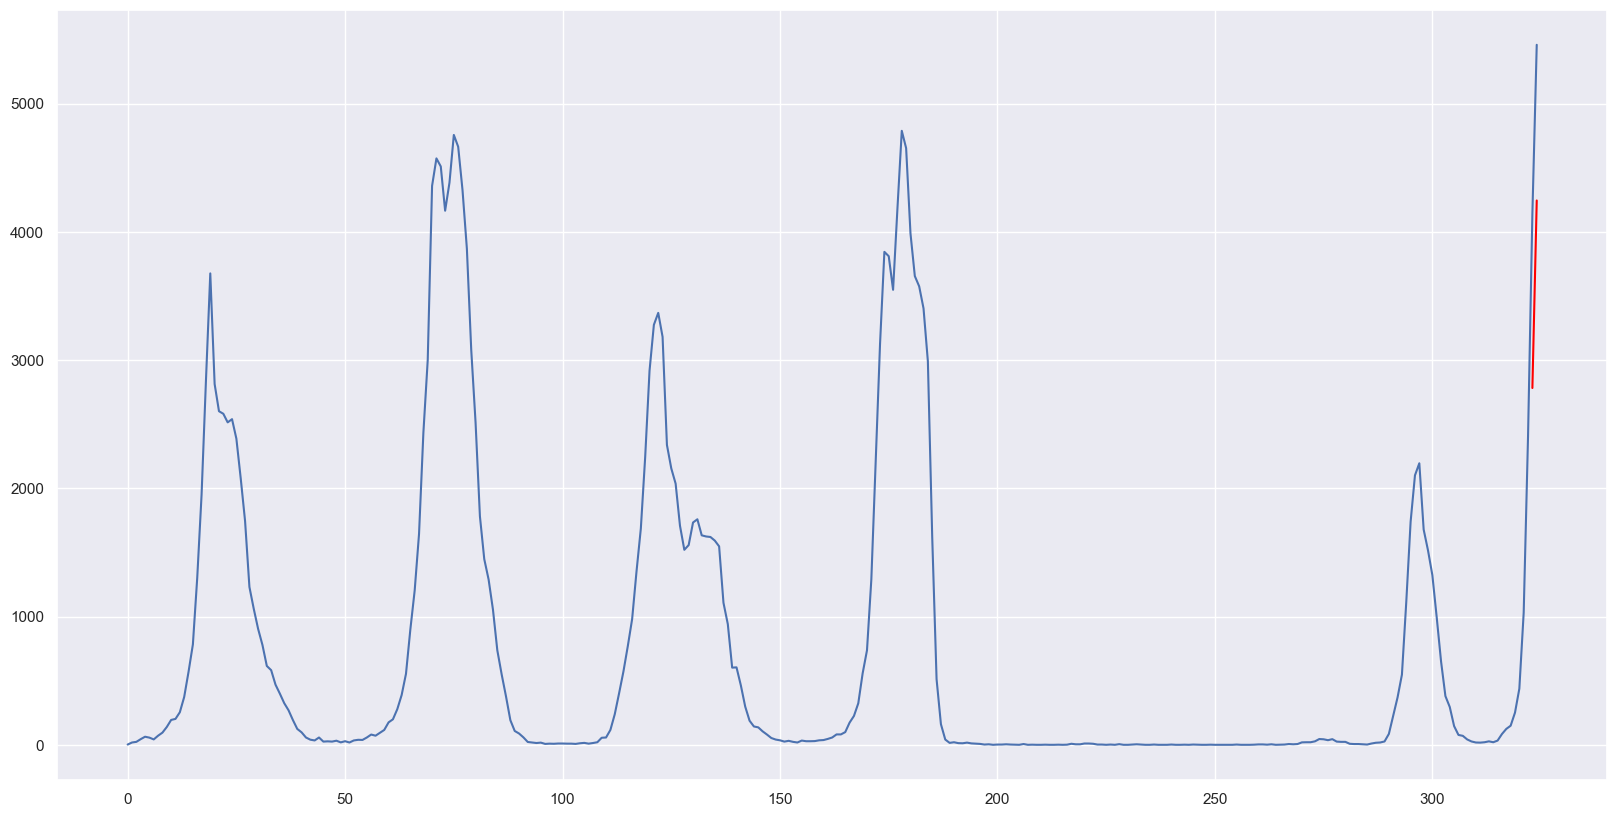

In [23]:
results_matrix = rf_model(data=df_time_features, weeks_to_predict=2, df_name='df_time_features', max_depth=None)

In [24]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test
0,rf,df_COVID_terms_pre_COVID,1,1284097.656,1133.18,863.896,202574.741,450.083,450.083
0,rf,df_COVID_terms_pre_COVID,2,1281098.556,1131.856,864.074,261765.646,511.63,510.064
0,rf,df_COVID_terms_pre_COVID,3,1263787.214,1124.183,863.332,144140.878,379.659,334.898
0,rf,df_COVID_terms_pre_COVID,4,1243927.645,1115.315,861.737,327080.118,571.909,387.797
0,rf,df_COVID_terms,1,983371.642,991.651,682.959,18217137.404,4268.154,4268.154
0,rf,df_COVID_terms,2,958233.029,978.894,672.53,15902387.801,3987.78,3933.119
0,rf,df_COVID_terms,3,951315.944,975.354,670.339,12901224.544,3591.827,3367.181
0,rf,df_COVID_terms,4,952351.794,975.885,670.829,9855763.71,3139.389,2656.231
0,rf,df_flu_symptoms_pre_COVID,1,208978.844,457.142,286.683,435719.268,660.09,660.09
0,rf,df_flu_symptoms_pre_COVID,2,207860.258,455.917,283.864,424747.631,651.727,650.498


Shape of train_X: (322, 30)
Shape of train_y: (322, 1)
Shape of test_X: (3, 30)
Shape of test_y: (3, 1)


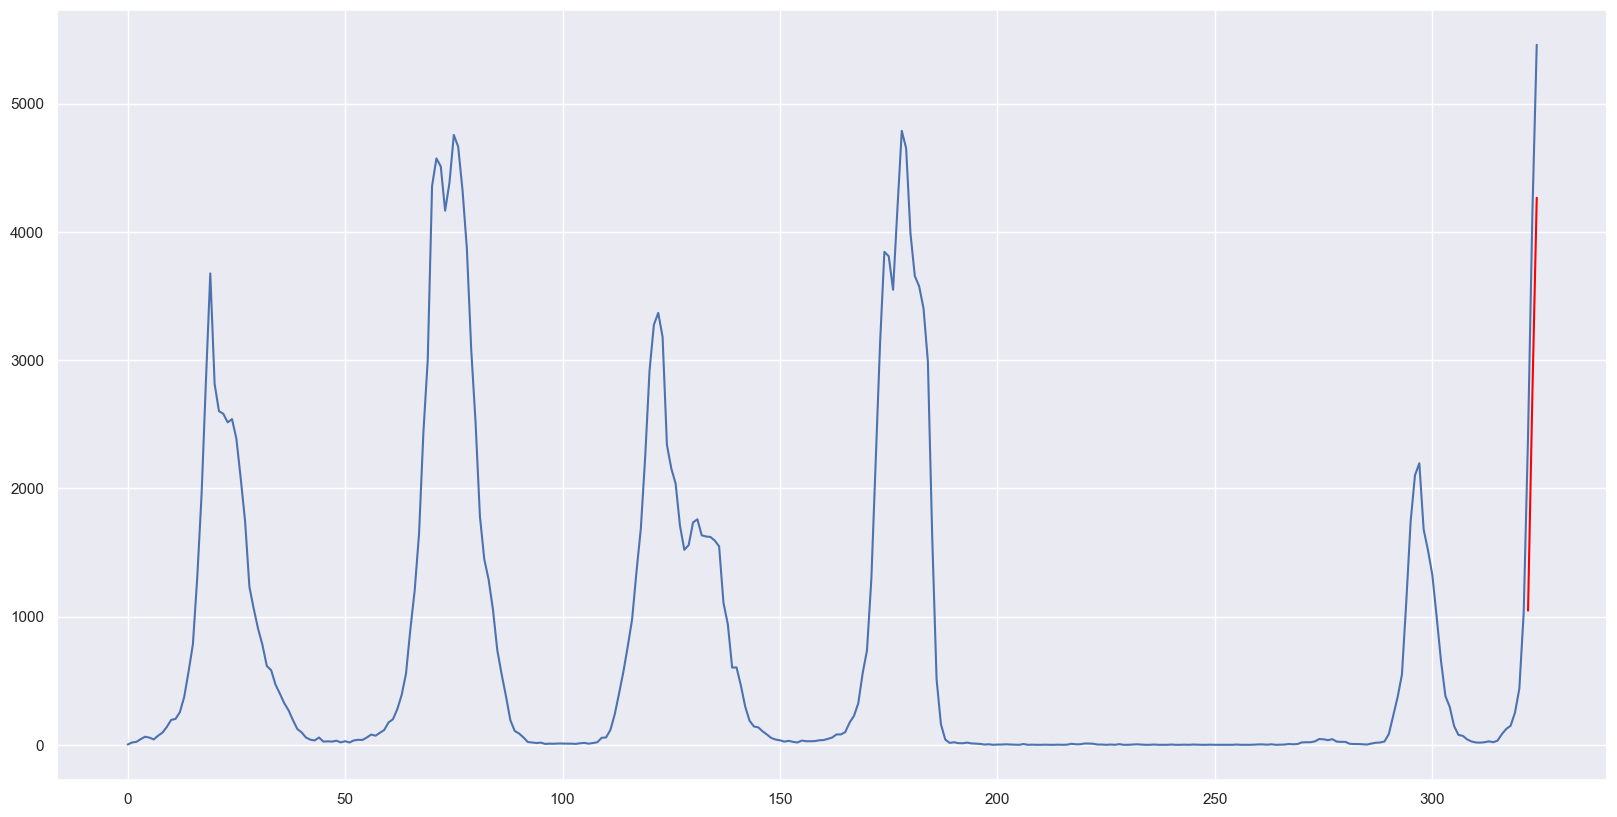

In [25]:
results_matrix = rf_model(data=df_time_features, weeks_to_predict=3, df_name='df_time_features', max_depth=None)

In [26]:
results_matrix

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test
0,rf,df_COVID_terms_pre_COVID,1,1284097.656,1133.18,863.896,202574.741,450.083,450.083
0,rf,df_COVID_terms_pre_COVID,2,1281098.556,1131.856,864.074,261765.646,511.63,510.064
0,rf,df_COVID_terms_pre_COVID,3,1263787.214,1124.183,863.332,144140.878,379.659,334.898
0,rf,df_COVID_terms_pre_COVID,4,1243927.645,1115.315,861.737,327080.118,571.909,387.797
0,rf,df_COVID_terms,1,983371.642,991.651,682.959,18217137.404,4268.154,4268.154
0,rf,df_COVID_terms,2,958233.029,978.894,672.53,15902387.801,3987.78,3933.119
0,rf,df_COVID_terms,3,951315.944,975.354,670.339,12901224.544,3591.827,3367.181
0,rf,df_COVID_terms,4,952351.794,975.885,670.829,9855763.71,3139.389,2656.231
0,rf,df_flu_symptoms_pre_COVID,1,208978.844,457.142,286.683,435719.268,660.09,660.09
0,rf,df_flu_symptoms_pre_COVID,2,207860.258,455.917,283.864,424747.631,651.727,650.498


Shape of train_X: (321, 30)
Shape of train_y: (321, 1)
Shape of test_X: (4, 30)
Shape of test_y: (4, 1)


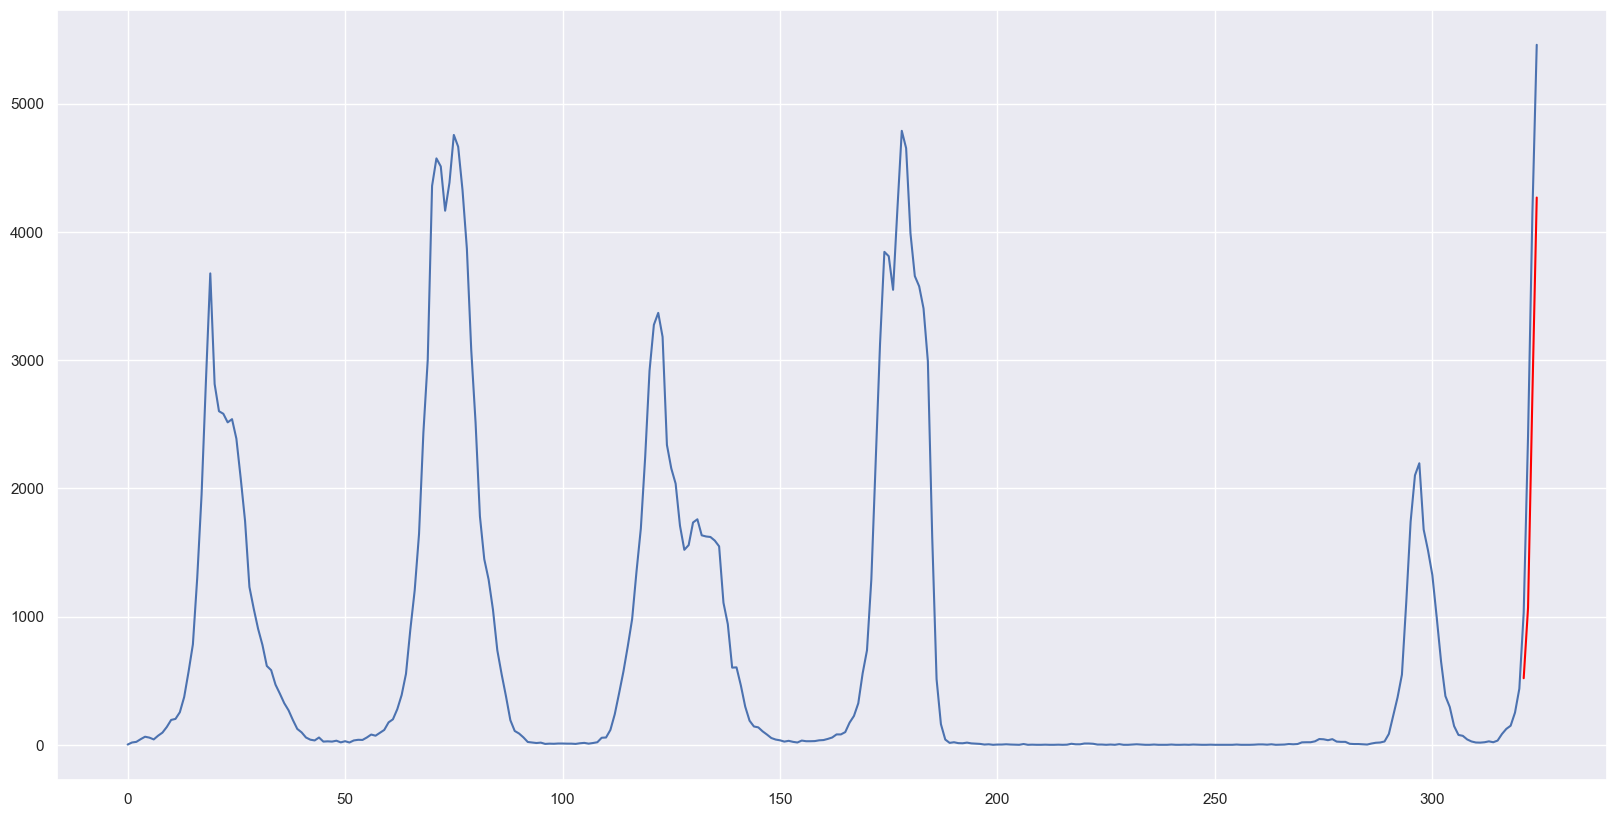

In [27]:
results_matrix = rf_model(data=df_time_features, weeks_to_predict=4, df_name='df_time_features', max_depth=None)

In [29]:
results_matrix.sort_values('RMSE_test')

,Model,Dataset,Weeks-ahead Forecast,MSE_train,RMSE_train,MAE_train,MSE_test,RMSE_test,MAE_test
0,rf,df_time_features_pre_COVID,1,8158.01,90.322,47.912,2170.628,46.59,46.59
0,rf,df_time_features_pre_COVID,2,8897.634,94.327,49.56,4050.237,63.641,60.285
0,rf,df_time_features_pre_COVID,4,9141.313,95.61,49.913,23446.848,153.124,124.63
0,rf,df_time_features_pre_COVID,3,9095.647,95.371,49.812,32896.527,181.374,117.363
0,rf,df_COVID_terms_pre_COVID,3,1263787.214,1124.183,863.332,144140.878,379.659,334.898
0,rf,df_health_indicators_pre_COVID,3,1517730.613,1231.962,989.93,182038.19,426.659,387.368
0,rf,df_health_indicators_pre_COVID,4,1523282.982,1234.214,991.339,185319.605,430.488,377.298
0,rf,df_COVID_terms_pre_COVID,1,1284097.656,1133.18,863.896,202574.741,450.083,450.083
0,rf,df_health_indicators_pre_COVID,1,1504605.838,1226.624,982.709,218995.471,467.97,467.97
0,rf,df_flu_symptoms_pre_COVID,4,214788.783,463.453,288.606,243593.986,493.552,468.207


In [ ]:
# split into train and test
X = df_time_features_pre_COVID.loc[:, df_time_features_pre_COVID.columns != 'Total Cases']
y = df_time_features_pre_COVID['Total Cases']


train_X = X.iloc[:-1].to_numpy()
train_y = y.iloc[:-1].to_numpy().reshape(-1,1)
test_X = X.iloc[-1].to_numpy().reshape(1,-1)
test_y = np.asarray(y.iloc[-1]).reshape(1,-1)

# train_X = X.iloc[:-1].to_numpy()
# train_y = y.iloc[:-1].to_numpy().reshape(-1,1)
# test_X = X.iloc[-1:].to_numpy()
# test_y = np.asarray(y.iloc[-1:]).reshape(-1,1)

print(f'Shape of train_X: {train_X.shape}')
print(f'Shape of train_y: {train_y.shape}')
print(f'Shape of test_X: {test_X.shape}')
print(f'Shape of test_y: {test_y.shape}')

# scale df_time_features_pre_COVID
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# instantiate model
rf = RandomForestRegressor(max_depth=max_depth, random_state=seed_value)

# fit the model
rf.fit(train_X, train_y.ravel())

# predict for train and test sets
preds_test = rf.predict(test_X)
preds_train = rf.predict(train_X)

# plot
plt.plot(df_time_features_pre_COVID.index, df_time_features_pre_COVID['Total Cases'].values)
plt.plot(df_time_features_pre_COVID.index[-1:], preds_test, color='red')

results = evaluate_model(test=test_y, predictions_test=preds_test, train=train_y, predictions_train=preds_train)



# results.insert(0, retrieve_name(rf))
# results.insert(1, df_name)
# results.insert(2, 1)

# results_matrix = pickle.load(open(r"..\df_time_features_pre_COVID\results_matrix.pkl", "rb" ))

# results_matrix = pd.concat([results_matrix.T, pd.Series(results, index=results_matrix.columns)], axis=1).T

# pickle.dump(results_matrix, open(r"..\df_time_features_pre_COVID\results_matrix.pkl", "wb" ))

# return results_matrix

#